In [1]:
from sklearn.datasets import make_classification
X_left, y = make_classification(n_samples = 100,
                                n_features = 5,
                                n_informative = 5,
                                n_redundant = 0,
                                n_repeated = 0,
                                n_classes = 2,
                                random_state = 7,
                                n_clusters_per_class = 2)

X_right, _ = make_classification(n_samples = 100,
                                 n_features = 15,
                                 n_informative = 1,
                                 n_redundant = 5,
                                 n_repeated = 5,
                                 n_classes = 1,
                                 random_state = 7,
                                 n_clusters_per_class = 1)

In [2]:
import numpy as np
X = np.hstack((X_left, X_right))

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost.core import XGBoostError
from lightgbm.sklearn import LightGBMError
from IPython.display import display

def plot_feature_importances(clf, X_train, y_train=None, top_n=10, figsize=(8, 8),
                             print_table=False, title="Feature Importances"):
    '''
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
    '''
    __name__ = "plot_feature_importances"
    
    try:
        if not hasattr(clf, "feature_importances_"):
            clf.fit(X_train.values, y_train.values.ravel())
            if not hasattr(clf, "feature_importances_"):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                     format(clf.__class__.__name__))
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())

    feat_imp = pd.DataFrame({"importance":clf.feature_importances_})
    feat_imp["feature"] = X_train.columns
    feat_imp.sort_values(by="importance", ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    feat_imp.sort_values(by="importance", inplace=True)
    feat_imp = feat_imp.set_index("feature", drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel("Feature Importance Score")
    plt.show()
    
    if print_table:
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by="importance", ascending=False))
    
    return feat_imp

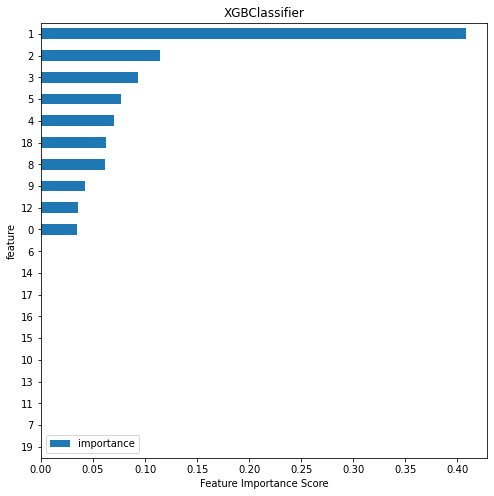

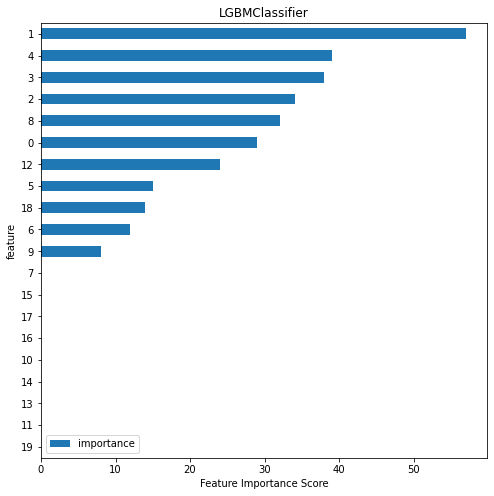

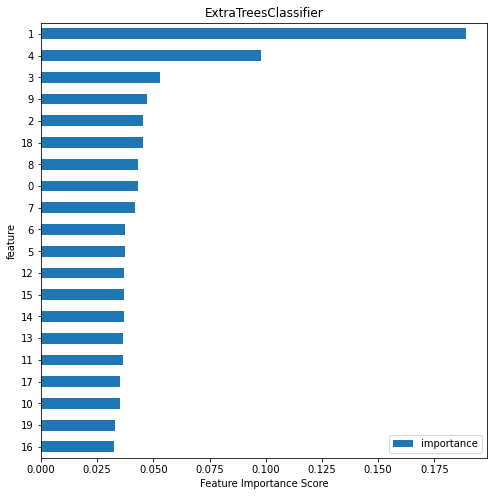

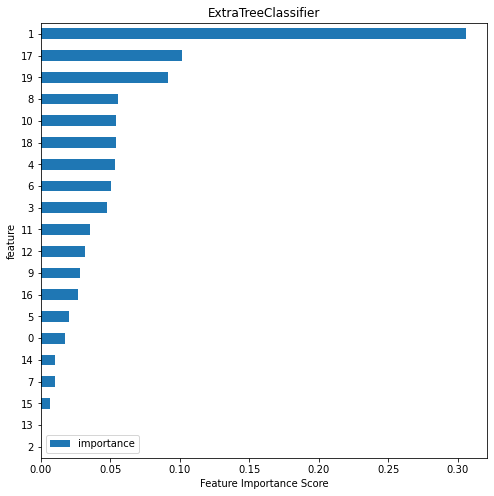

BaggingClassifier does not have feature_importances_ attribute


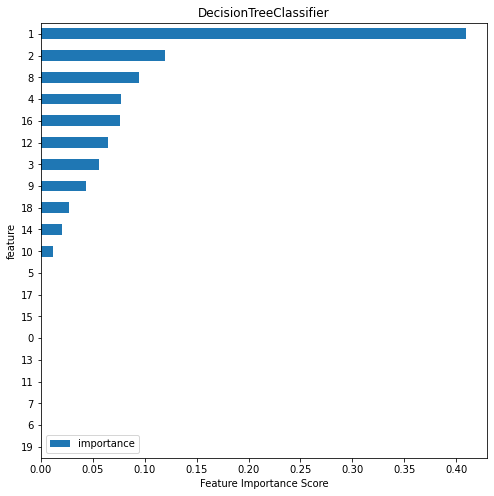

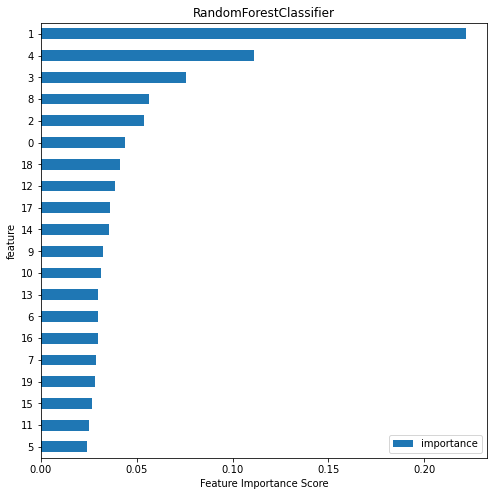

LogisticRegression does not have feature_importances_ attribute


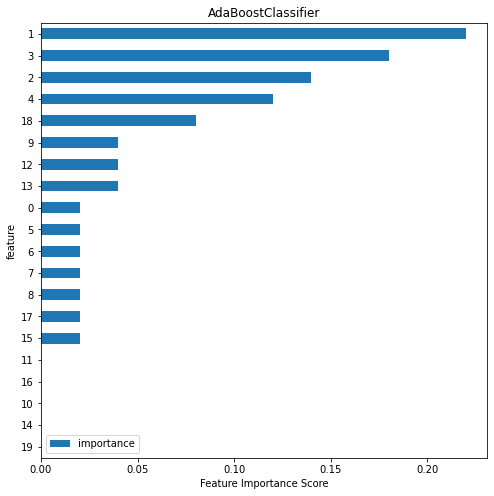

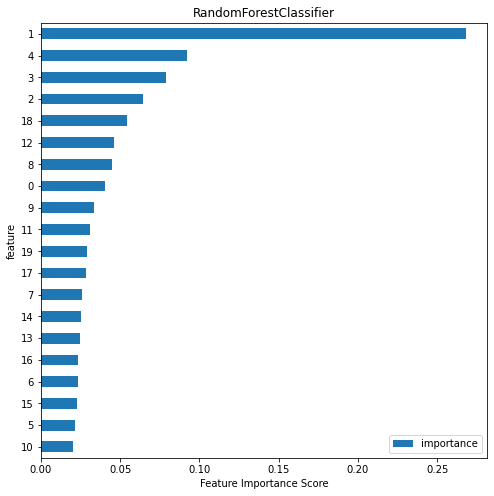

In [6]:
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

clfs = [XGBClassifier(), LGBMClassifier(), 
        ExtraTreesClassifier(), ExtraTreeClassifier(), 
        BaggingClassifier(), DecisionTreeClassifier(), 
        RandomForestClassifier(), LogisticRegression(), 
        AdaBoostClassifier(), RandomForestClassifier()]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf, X_train, y_train, top_n = X_train.shape[1], title = clf.__class__.__name__)
    except AttributeError as e:
        print(e)